<a href="https://colab.research.google.com/github/kelvinchiluwe/machine-learning/blob/main/Copy_of_early_stoping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
print(fashion_mnist)

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>


In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_reshaped = X_train.reshape(X_train.shape[0], -1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)


In [30]:
model=tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # tf.keras.layers.
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(50,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
history=model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),

model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True
)

History = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/100
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3200 - loss: 6.6528

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3203 - loss: 6.6318 - val_accuracy: 0.5700 - val_loss: 1.1170
Epoch 2/100
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4927 - loss: 1.3528

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4929 - loss: 1.3523 - val_accuracy: 0.6529 - val_loss: 0.9213
Epoch 3/100
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5656 - loss: 1.1367

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5656 - loss: 1.1367 - val_accuracy: 0.7022 - val_loss: 0.7763
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5879 - loss: 1.0588 - val_accuracy: 0.7054 - val_loss: 0.7884
Epoch 5/100
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6107 - loss: 0.9961

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6107 - loss: 0.9961 - val_accuracy: 0.7186 - val_loss: 0.7170
Epoch 6/100
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6337 - loss: 0.9277

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6338 - loss: 0.9276 - val_accuracy: 0.7517 - val_loss: 0.6412
Epoch 7/100
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6701 - loss: 0.8372

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6702 - loss: 0.8372 - val_accuracy: 0.7674 - val_loss: 0.6245
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6892 - loss: 0.8014 - val_accuracy: 0.7472 - val_loss: 0.6315
Epoch 9/100
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7026 - loss: 0.7539

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7027 - loss: 0.7538 - val_accuracy: 0.7810 - val_loss: 0.5929
Epoch 10/100
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7228 - loss: 0.7180

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7228 - loss: 0.7180 - val_accuracy: 0.8051 - val_loss: 0.5589
Epoch 11/100
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7276 - loss: 0.6946

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7276 - loss: 0.6946 - val_accuracy: 0.8107 - val_loss: 0.5402
Epoch 12/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7359 - loss: 0.6833 - val_accuracy: 0.8089 - val_loss: 0.5461
Epoch 13/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7578 - loss: 0.6631 - val_accuracy: 0.8170 - val_loss: 0.5486
Epoch 14/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7757 - loss: 0.6342 - val_accuracy: 0.8194 - val_loss: 0.5518
Epoch 15/100
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7776 - loss: 0.6201

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7776 - loss: 0.6201 - val_accuracy: 0.8200 - val_loss: 0.5401
Epoch 16/100
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7892 - loss: 0.5884

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7892 - loss: 0.5885 - val_accuracy: 0.8332 - val_loss: 0.5212
Epoch 17/100
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7899 - loss: 0.5871

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7899 - loss: 0.5871 - val_accuracy: 0.8312 - val_loss: 0.5037
Epoch 18/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8041 - loss: 0.5534 - val_accuracy: 0.8256 - val_loss: 0.5416
Epoch 19/100
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8028 - loss: 0.5526

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8028 - loss: 0.5527 - val_accuracy: 0.8422 - val_loss: 0.4663
Epoch 20/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8041 - loss: 0.5528 - val_accuracy: 0.8293 - val_loss: 0.5096
Epoch 21/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8092 - loss: 0.5475 - val_accuracy: 0.8454 - val_loss: 0.4772
Epoch 22/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8115 - loss: 0.5347 - val_accuracy: 0.8230 - val_loss: 0.4768
Epoch 23/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8098 - loss: 0.5353 - val_accuracy: 0.8350 - val_loss: 0.4872
Epoch 24/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8150 - loss: 0.5270 - val_accuracy: 0.8389 - val_loss: 0.4834


In [21]:
model.save('best_fashion_model.keras')


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       1.00      0.88      0.94      1000
           2       0.23      0.99      0.38      1000
           3       0.78      0.71      0.74      1000
           4       0.00      0.00      0.00      1000
           5       0.95      0.92      0.93      1000
           6       0.00      0.00      0.00      1000
           7       0.84      0.97      0.90      1000
           8       0.96      0.91      0.94      1000
           9       0.97      0.84      0.90      1000

    accuracy                           0.62     10000
   macro avg       0.57      0.62      0.57     10000
weighted avg       0.57      0.62      0.57     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
y_pred_prob = model.predict(X_test)

y_pred = np.argmax(y_pred_prob, axis=1)


cm = confusion_matrix(y_test, y_pred)
print(y_pred_prob)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[4.31228780e-33 8.76568833e-27 9.50545651e-26 ... 5.20308316e-02
  3.32943707e-11 9.09894466e-01]
 [7.81026728e-08 4.79611163e-06 9.89553452e-01 ... 1.36700289e-26
  5.68927128e-09 8.79691553e-29]
 [0.00000000e+00 9.99999940e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.13106560e-09 1.00479945e-16 1.26532162e-14 ... 1.48380785e-09
  9.99989569e-01 1.08748178e-12]
 [0.00000000e+00 9.99999940e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.66464592e-23 1.58275850e-26 ... 4.11315076e-03
  1.99438475e-08 1.85824896e-03]]


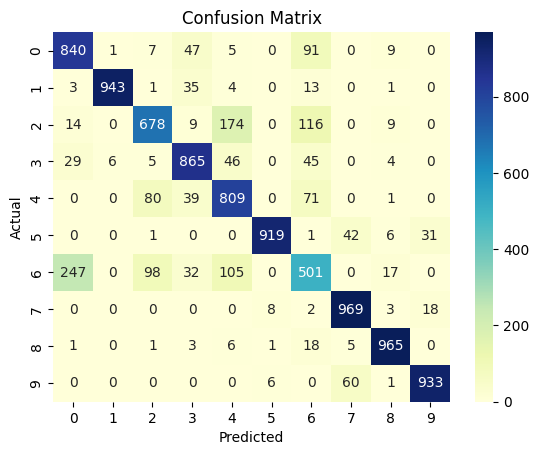

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['0',  '1', '2', '3', '4', '5', '6', '7', '8','9'], yticklabels=['0','1', '2', '3', '4', '5', '6', '7', '8', '9']) # Adjusted tick labels for 10 classes
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()